<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/01_2_kmeans_hbms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data, _ = make_blobs(n_samples=1000, centers=8, cluster_std=1.00, random_state=0)

8개의 center설정

In [3]:
data.shape

(1000, 2)

Text(0, 0.5, 'y')

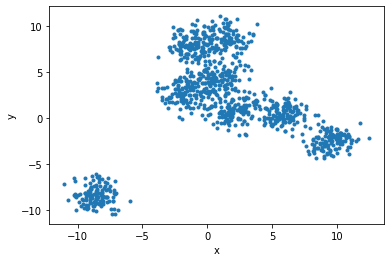

In [4]:
plt.plot(data[:,0],data[:,1],'.')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
%%time
kmeans = KMeans(n_clusters=4).fit(data)

CPU times: user 38.5 ms, sys: 842 µs, total: 39.3 ms
Wall time: 44.1 ms


4로 설정하기

In [6]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.08560609  8.09913786]
 [-8.59224715 -8.33283854]
 [ 7.71891674 -1.03114706]
 [ 0.43394106  2.49975868]]


In [7]:
kmeans.inertia_

5199.066240532728

In [8]:
kmeans.labels_

array([2, 1, 3, 2, 0, 3, 2, 2, 0, 1, 3, 3, 1, 2, 1, 1, 0, 1, 3, 3, 2, 3,
       3, 1, 3, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 2, 2, 0,
       0, 2, 1, 3, 2, 2, 2, 3, 3, 3, 3, 1, 2, 0, 3, 2, 3, 3, 1, 2, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2, 1, 3, 2, 1, 1, 3, 1, 0, 3,
       3, 2, 0, 3, 1, 0, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 2, 2,
       0, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3,
       2, 2, 0, 0, 3, 3, 3, 2, 0, 0, 3, 3, 3, 0, 0, 3, 2, 3, 3, 3, 3, 0,
       0, 1, 2, 3, 1, 1, 3, 0, 3, 2, 1, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 2, 2, 2, 3, 0, 3, 3, 3, 0, 2, 1, 1, 3, 0, 1, 2, 1, 3, 2,
       3, 3, 0, 3, 2, 0, 3, 0, 3, 2, 3, 1, 2, 1, 2, 0, 3, 1, 3, 2, 0, 3,
       0, 2, 0, 3, 2, 0, 0, 0, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 2, 0, 3,
       2, 3, 1, 2, 3, 3, 3, 3, 3, 0, 2, 2, 0, 3, 3, 3, 0, 0, 2, 0, 3, 1,
       0, 0, 0, 3, 1, 0, 3, 0, 3, 3, 2, 3, 0, 1, 3, 1, 3, 2, 1, 3, 1, 3,
       1, 0, 0, 2, 2, 2, 1, 3, 0, 3, 0, 3, 0, 2, 2,

Text(0, 0.5, 'y')

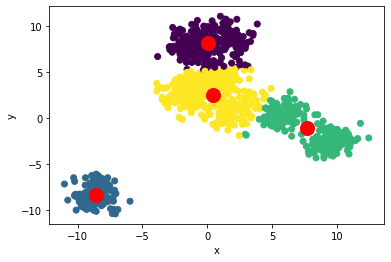

In [9]:
plt.scatter(data[:, 0], data[:, 1], c = kmeans.labels_)
plt.plot(centroids[:,0], centroids[:,1], 'ro', markersize=14 )
plt.xlabel('x')
plt.ylabel('y')

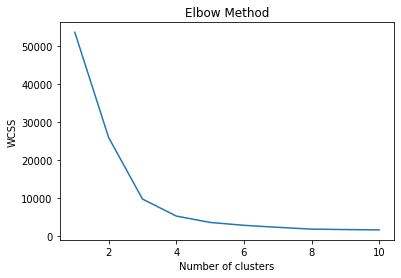

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

8보다 4에서 level off가 시작되는 것처럼 보인다